## Forage de données - TP1
Ala Antabli, Josselin Dubois, Antoine Guénard, Gurleen Padda

In [13]:
# imports

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from pandas.api.types import is_object_dtype, is_numeric_dtype
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import distance, distance_matrix


# plots settings
%matplotlib inline

sns.set(color_codes=True)
sns.set_palette(sns.color_palette('muted'))

import warnings
warnings.filterwarnings('ignore')

### 1. Représentation des données

## a)

In [14]:
# loading datas
data = pd.read_excel("QSAR_dataset.xlsx")
data.head()

,SMILES,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
0,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,Class 2,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,...,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
1,c12c(cccc1)cccc2,Class 2,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,...,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
2,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,Class -2,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,...,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
3,ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)...,Class -2,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,...,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
4,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(...,Class -2,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,...,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112


In [15]:
# global variables
n_data, n_features = data.shape
n_classes = 5

In [16]:
#Inspect the data
data.describe()

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
count,154.000000,152.000000,153.000000,154.000000,154.000000,153.000000,154.000000,153.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,1.470000e+02,141.000000,136.000000,154.000000,154.000000
mean,34.610698,105.781739,359.928668,23.909091,0.292208,18.875817,17.350649,33.912102,11.649351,3.110390,...,273.307303,8.076532,239.944812,9.086768,2.379611,-6.802721e+08,-66.497364,-2.501405,359.813016,101.350649
std,5.951534,62.391286,111.225998,4.895461,0.862625,5.596428,5.028718,9.714722,2.472152,2.954031,...,52.783753,14.721655,59.915749,15.129738,2.637952,8.247861e+09,73.647379,2.807324,132.955027,33.487395
min,17.148172,8.778115,122.917570,12.000000,0.000000,10.000000,6.000000,12.000000,6.000000,0.000000,...,140.102050,0.000000,67.651054,0.000000,0.011998,-1.000000e+11,-209.769584,-8.247237,128.174000,46.000000
25%,31.534723,70.909811,330.864750,22.000000,0.000000,17.000000,16.000000,30.541887,12.000000,0.000000,...,246.182178,0.000000,203.302167,0.000000,0.124434,2.696068e-01,-132.566487,-5.058933,291.992000,88.000000
50%,35.579689,98.659012,389.503510,22.000000,0.000000,18.000000,17.000000,31.868664,12.000000,4.000000,...,281.160615,0.000000,253.968020,0.000000,0.376156,8.136986e-01,-10.648449,-0.411358,360.881990,94.000000
75%,38.401845,139.629990,427.294460,25.750000,0.000000,19.000000,18.000000,37.087944,12.000000,6.000000,...,295.503230,13.566921,272.261230,13.566921,4.786711,9.972196e+00,-3.509363,-0.133136,410.317990,106.000000
max,52.422001,356.764860,622.904600,43.000000,4.000000,43.000000,40.000000,86.319427,20.000000,10.000000,...,432.120120,59.150364,475.687620,59.150364,7.429943,1.611555e+01,-0.338738,-0.013318,959.170960,246.000000


In [17]:
# Check features with NA
na_values = data.isnull().sum() / data.shape[0]
na_values[na_values > 0]

ASA+       0.012987
ASA-       0.006494
a_heavy    0.006494
a_IC       0.006494
vsurf_R    0.045455
vsurf_S    0.084416
vsurf_V    0.116883
dtype: float64

Les valeurs manquants pour les attributs `ASA+`, `ASA-`, `a_heavy`, `a_IC` representent au maximum 3% des données, donc on peut les supprimer sans perdre trop de données. Pour les 3 autres attributs, il y aura trop de perte, donc nous allons remplacer les valeurs manquants par la médiane.

In [18]:
# clean the NAs
def drop_na(*features, data = data):
    """
    delete all the lines where a `feature` contains an NA
    """
    data.dropna(subset=features, inplace=True)

def fill_na_with_median(*features, data = data):
    """
    fill the NAs of a `feature` by its median
    """
    for feature in features:
        median = data[feature].median()
        data[feature].fillna(value=median, inplace=True)

drop_na('ASA+', 'ASA-', 'a_heavy', 'a_IC')
fill_na_with_median('vsurf_R', 'vsurf_S', 'vsurf_V')


In [19]:
#Check for data of type object
[col for col in data.columns if is_object_dtype(data[col]) ]

['SMILES', 'Class']

In [20]:
#Removing SMILES and class
clean_data = data.iloc[:, 2:]

In [21]:
# Select 10 best features
kbest = SelectKBest(f_classif, k = 10)
kbest.fit_transform(clean_data, data["Class"])

best_features = kbest.get_feature_names_out()
data_bf = data[best_features]
data_bf["Class"] = data["Class"]

## b)

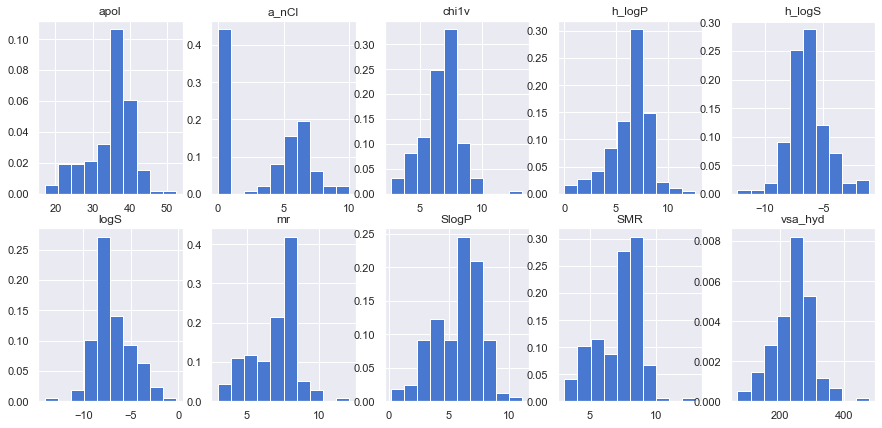

In [22]:
# Visualize the distributions of those 10 features

_, axs = plt.subplots(2, 5, figsize=(15, 7))
for idx, feature in enumerate(best_features):
    row, col = idx // 5, idx % 5

    axs[row, col].hist(data_bf[feature], density=True)
    axs[row, col].set_title(feature)


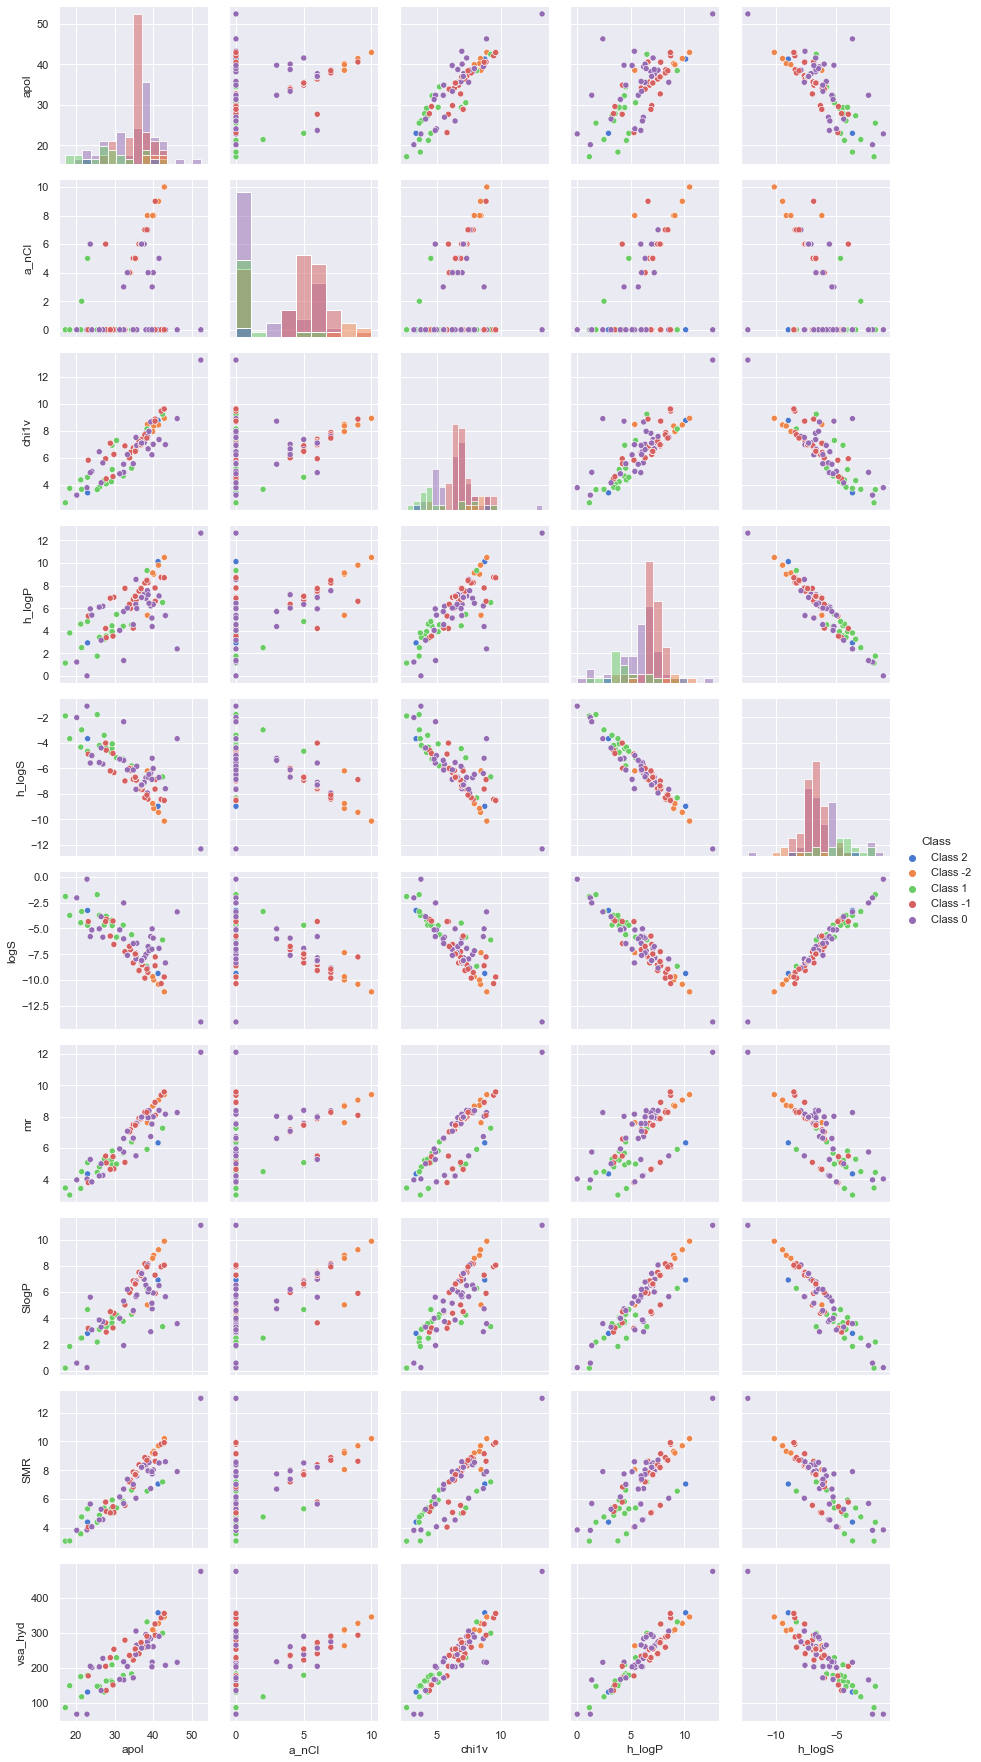

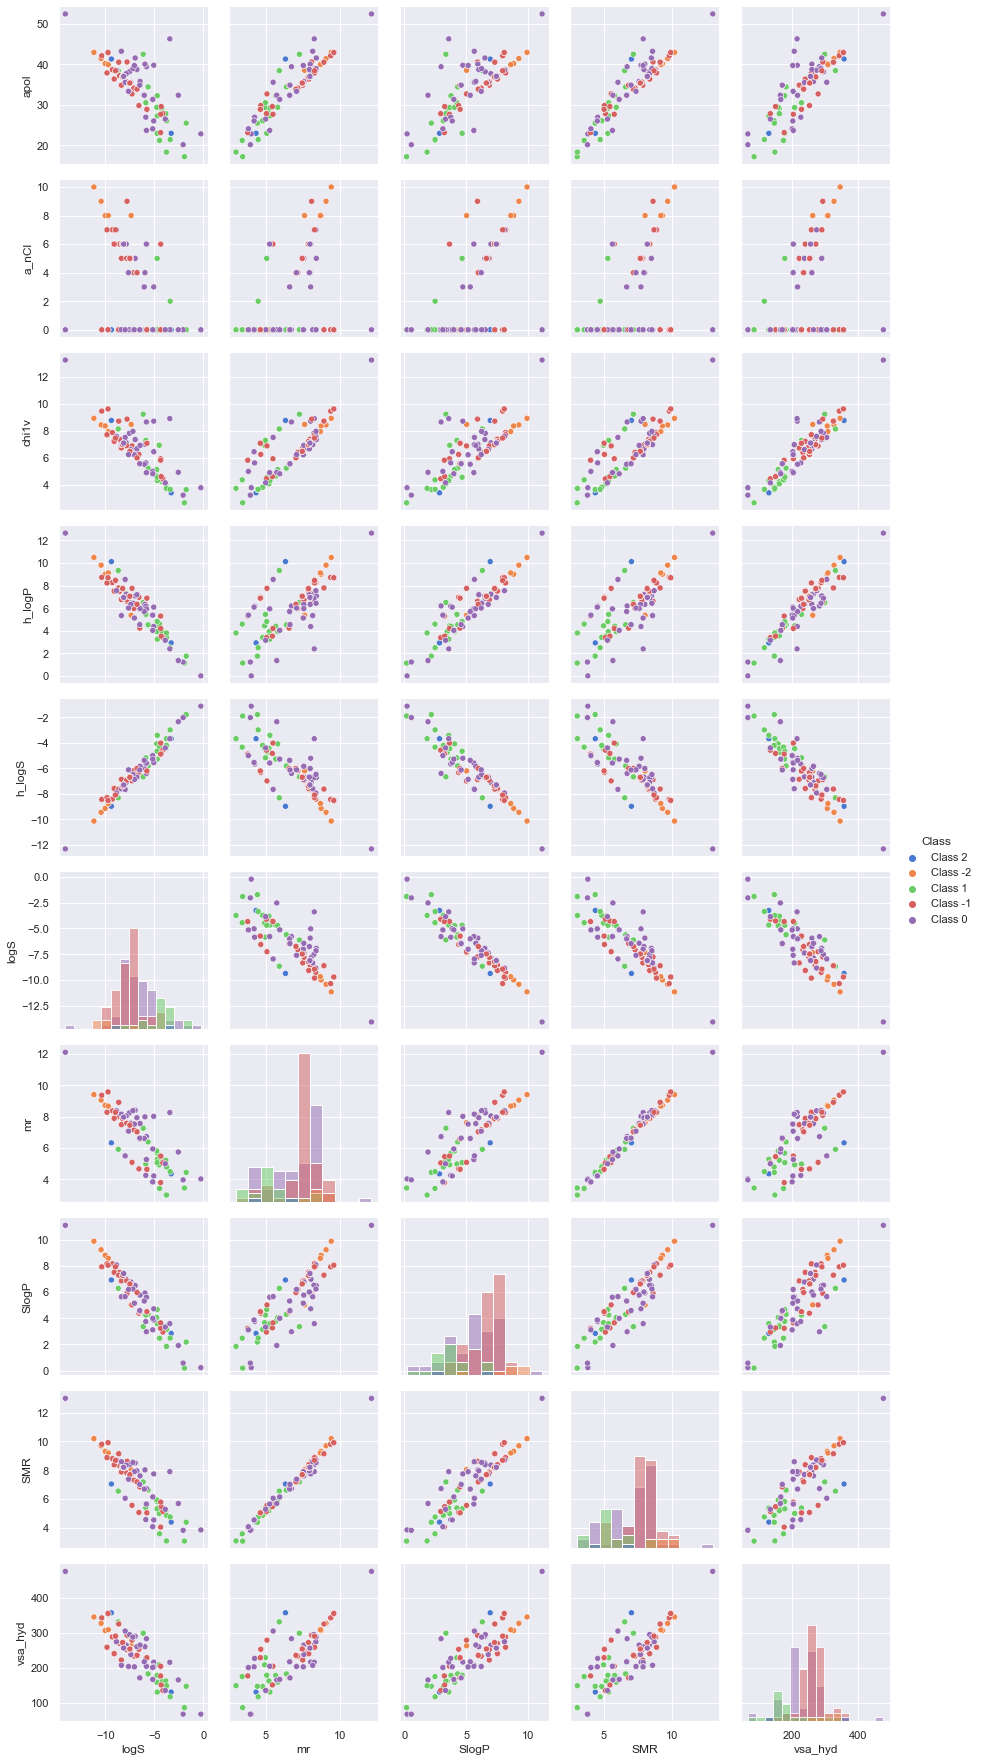

In [23]:
# Visualize correlations and distributions of those features
x_vars = best_features[0:5]
y_vars = best_features
g = sns.PairGrid(data_bf, hue = "Class", x_vars = x_vars, y_vars = y_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();
x_vars = best_features[5:]
y_vars = best_features
g = sns.PairGrid(data_bf, hue = "Class", x_vars = x_vars, y_vars = y_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

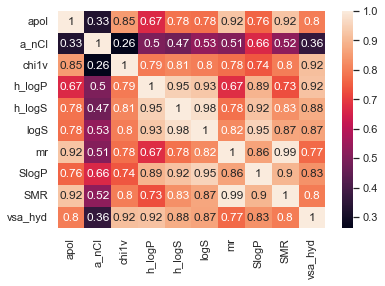

In [24]:
# Correlation of the features
best_features_corr = data_bf.corr()
sns.heatmap(abs(best_features_corr), annot = True);

On peut voir sur la matrice de correlation que tous les valeurs sont plus grands que 0.65 sauf ceux de l'attribut `a_nCl`, et que la plupart tendent vers 1. Il est donc pertinent de faire une ACP pour réduire la dimension inutile.

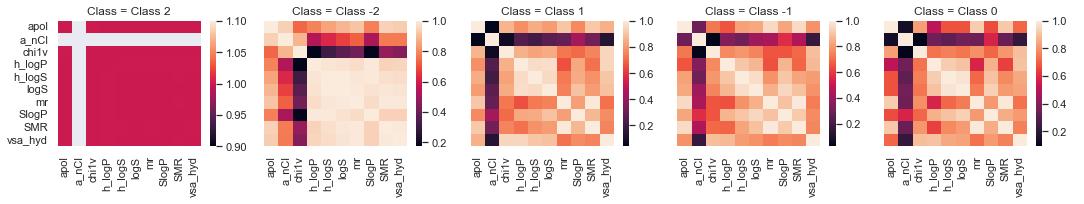

In [25]:
# Correlation of the features, depending on the class
g = sns.FacetGrid(data=data_bf, col="Class", col_wrap=5)
g.map_dataframe(lambda data, color: sns.heatmap(abs(data.corr())))
g.add_legend();


On peut voir pour les classes 2 et -2 en particulier qu'il y a beaucoup de correlations entre les attributs et il est donc inutile de tous les garder. On peut aussi voir que l'attribut `a_nCl` est seulement correlé avec les autres attributs pour les données de la classe 2 et -2. 

## c)

In [26]:
def _nearest_centroid(point, centroids, dist, maha = False, v_matrix = None):
    if maha:
        distances = [dist(point, centroid, v_matrix) for centroid in centroids]
    else:
        distances = [dist(point, centroid) for centroid in centroids]

    return np.argmin(distances)


def assign_to_centroids(points, centroids, dist, maha = False, v_matrix = None):
    return np.array([_nearest_centroid(point, centroids, dist, maha, v_matrix) for point in points])


def rand_index(observed, actual):
    n = len(observed)
    a, b, c, d = 0, 0, 0, 0
    for i in range(n):
        for j in range(i+1, n):
            
            if observed[i] == observed[j]:
                if actual[i] == actual[j]:
                    a += 1
                else:
                    c += 1
            else:
                if actual[i] == actual[j]:
                    d += 1
                else:
                    b += 1
    
    return (a + b) / (a + b + c + d)


def get_centroids(data, *classes):
    
    centroids = []
    for classe in classes:
        if pd.notna(classe):
            data_classe = data.loc[data["Class"] == classe]
            centroid_df = data_classe.mean()
            centroids.append(centroid_df.to_numpy())

    return np.array(centroids)


Analysis with 2 components
--------------------------
RAND index : 0.6118265916923635
explained variance : [0.99294572 0.00400607]


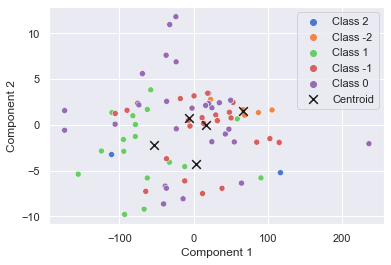

Analysis with 3 components
--------------------------
RAND index : 0.6118265916923635
explained variance : [0.99294572 0.00400607 0.0023471 ]


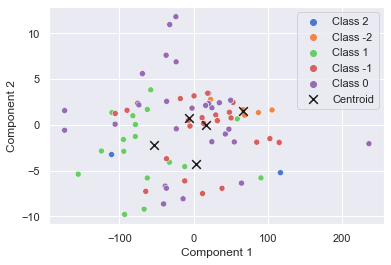

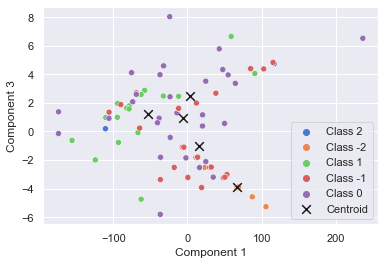

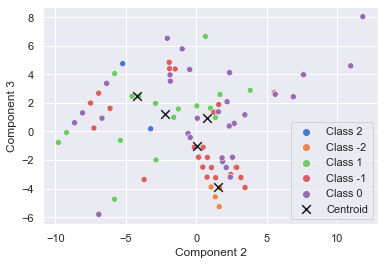

In [30]:
def pca(n_components, dist = distance.euclidean, maha = False, *, show_rand = True, show_variance = True, visualize = True):

    pca_ = PCA(n_components=n_components)
    data_features = data_bf.drop("Class", axis = 1)
    reduced_data = pca_.fit_transform(data_features)
    
    pca_df = pd.DataFrame(reduced_data, columns = [f"Comp {i+1}" for i in range(n_components)])
    pca_df.index = data.index
    pca_df["Class"] = data_bf["Class"].copy()
    
    centroids = get_centroids(pca_df, *pd.unique(pca_df["Class"]))

    v_matrix = np.cov(reduced_data.T) if maha else None
    class_assignation = assign_to_centroids(reduced_data, centroids, dist, maha, v_matrix)

    if show_rand:
        rand = rand_index(class_assignation, data_bf["Class"].to_numpy())
        print(f"RAND index : {rand}")

    if show_variance:
        explained_variance = pca_.explained_variance_ratio_
        print(f"explained variance : {explained_variance}")

    if visualize:
        data_comp = data.copy()
        for i in range(n_components):
            data_comp[f"Comp {i+1}"] = reduced_data[:, i]

        # Components visualization
        for i in range(n_components):
            for j in range(i+1, n_components):

                sns.scatterplot(x=f"Comp {i+1}", y=f"Comp {j+1}", hue="Class", data=data_comp)
                plt.scatter(x = centroids[:, i], y = centroids[:, j], marker="x", s=75, c="k", label = "Centroid")

                plt.xlabel(f"Component {i+1}")
                plt.ylabel(f"Component {j+1}")
                plt.legend()
                plt.show()

    return pca_df, pca_


pca_components = [2, 3]
for n_components in pca_components:
    print(f"Analysis with {n_components} components")
    print("--------------------------")
    pca(n_components)


On obtient des performances identiques pour 2 et 3 composantes, c'est que la dernière n'est pas utile (on le voit aussi à sa variance expliquée très faible). On se contentera donc de deux composantes.

### 2. Mesure de distance

## a)

In [86]:
distances = [("Eucilidean", distance.euclidean, False), ("Manhattan", distance.cityblock, False), ("Mahalanobis", distance.mahalanobis, True)]

for name, dist, maha in distances:
    print(f"{name} distance:")
    pca(2, dist, maha, visualize=False, show_variance=False)
    print()

Eucilidean distance:
RAND index : 0.6118265916923635

Manhattan distance:
RAND index : 0.6118265916923635

Mahalanobis distance:
RAND index : 0.6115545075276619



Les meilleures mésures de distance sont les distances Euclidean et Manhattan puisque leurs indices de Rand sont les plus grands.

## b)
Une matrice de covariance pour toutes les données sera mieux parce que si on a une matrice par classe, lorsqu'on doit classifier un nouveau point on ne peut pas savoir quel matrice utiliser.

### 3. Choix du modèle de classification

## a)

Nous allons utiliser la distance euclidean pour implementer le kNN et le méthode du plus proche centroide.

k-nn RAND index : 0.7181208053691275


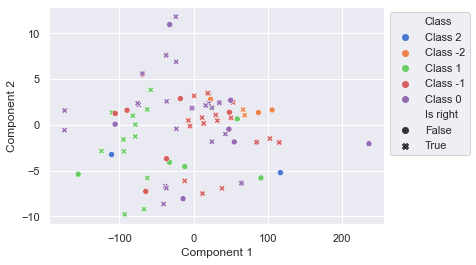

centroids RAND index : 0.61518229639035


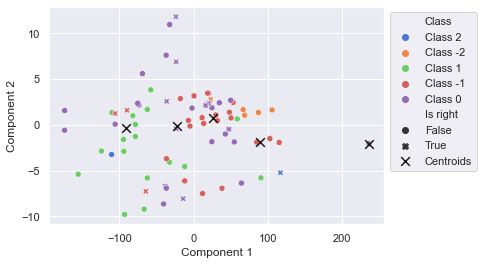

In [35]:
def dist_matrix(points):
    return np.array([np.array([distance.euclidean(p1, p2) for p1 in points]) for p2 in points])


def knn_prepare_data():
    pca_data, pca_model = pca(2, distance.euclidean, maha = False, show_rand = False, show_variance = False, visualize = False)
    points = pca_data.loc[:, pca_data.columns != "Class"].to_numpy()
    d_mat = dist_matrix(points)

    return pca_data, pca_model, points, d_mat


def new_knn(new_point, points, pca_data, pca_model, *, dist_mat = None, idx = None, k = 5):

    if dist_mat is not None:
        dist_to_other_points = dist_mat[idx]
    else:
        v_matrix = np.cov(points.T)
        new_point = new_point.to_numpy().reshape(1, -1)
        new_point = pca_model.transform(new_point)
        
        dist_to_other_points = [
            distance.euclidean(new_point, point) for point in points
        ]
        # print(new_point)

    neighbours_sorted = np.argsort(dist_to_other_points)
    k_nearest_neighbours = neighbours_sorted[:k]

    k_nearest_classes = pca_data.iloc[k_nearest_neighbours]
    k_nearest_classes = k_nearest_classes[["Class"]].to_numpy().flatten()

    classes, counts = np.unique(k_nearest_classes, return_counts = True)
    max_idx = np.argmax(counts)

    knn_classe = classes[max_idx]

    return knn_classe



def knn(k = 5, *, show_rand = True, visualize = True):

    pca_data, pca_model, points, d_mat = knn_prepare_data()

    knn_classes = []

    for i in range(len(points)):
        knn_classes.append(
            new_knn(points[i], points, pca_data, pca_model, dist_mat = d_mat, idx = i)
        )

    knn_classes = np.array(knn_classes)

    if show_rand:
        rand = rand_index(knn_classes, pca_data["Class"].to_numpy())
        print(f"k-nn RAND index : {rand}")

    if visualize:
        is_right_data = pca_data.copy()
        is_right = [knn_classes[i] == pca_data["Class"].to_numpy()[i] for i in range(len(knn_classes))]
        is_right_serie = pd.Series(is_right)
        is_right_data["Is right"] = is_right_serie

        sns.scatterplot(x=f"Comp {1}", y=f"Comp {2}", hue="Class", style = "Is right", data=is_right_data)
        plt.xlabel(f"Component {1}")
        plt.ylabel(f"Component {2}")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()
    return knn_classes



def cost_function(points, centroids, v_matrix, k):
    return sum([
        sum([
            distance.euclidean(point, centroids[c])
            for point, classe in points
            if classe == c
        ])
        for c in range(k)
    ])

    


def centroids(k = 5, *, show_rand = True, visualize = True):

    def get_centroids(pts):
        return [
            sum([
                point for point, classe in pts if classe == c
            ]) / max(1, len([point for point, classe in pts if classe == c]))
            for c in range(k)
        ]

    pca_data, _ = pca(2, distance.euclidean, maha=False, show_rand = False, show_variance = False, visualize = False)
    points = pca_data.loc[:, pca_data.columns != "Class"].to_numpy()

    # initial centers
    centroids = np.random.choice(pca_data.shape[0], size = k)
    v_matrix = np.cov(points.T)

    classes = assign_to_centroids(points, centroids, distance.euclidean, maha = False, v_matrix = None)

    points_with_classes = list(zip(points, classes))
    score = 0

    eps = 0.000001

    max_n = 1000
    n = 0
    while abs((actual_score := cost_function(points_with_classes, centroids, v_matrix, k)) - score) >= eps:
        n += 1
        if n >= max_n:
            break
        score = actual_score
        centroids = get_centroids(points_with_classes)
        classes = assign_to_centroids(points, centroids, distance.euclidean, maha = False, v_matrix = None)

        points_with_classes = list(zip(points, classes))
    if show_rand:
        rand = rand_index(classes, pca_data["Class"].to_numpy())
        print(f"centroids RAND index : {rand}")
        
    if visualize:
        classes_v = [int(s[6:])+2 for s in pca_data["Class"].to_numpy()]
        is_right_data = pca_data.copy()
        is_right = [classes_v[i] == classes[i] for i in range(len(classes_v))]
        is_right_serie = pd.Series(is_right)
        is_right_data["Is right"] = is_right_serie
        
        sns.scatterplot(x=f"Comp {1}", y=f"Comp {2}", hue="Class", style = "Is right", data=is_right_data)
        plt.scatter(x = np.array(centroids)[:, 0], y = np.array(centroids)[:, 1], marker="x", s=75, c="k", label = "Centroids")
        plt.xlabel(f"Component {1}")
        plt.ylabel(f"Component {2}")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()
    return classes
knn()
centroids();

Le modèle kNN atteint une meilleure classification sur les données d'entrainement puisque l'indice de rand est plus grand que celle du modèle centroid.

## b)

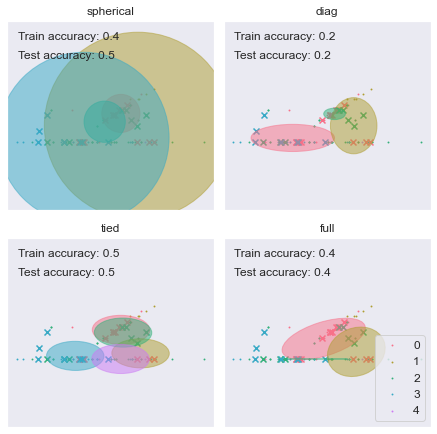

In [41]:
# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# Modified by Aida Ouangraoua <aida.ouangraoua@usherbrooke.com>
# Modified by Nadia Tahiri <Nadia.Tahiri@USherbrooke.com>
# Initial code at https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

X_ = data_bf.drop("Class", axis = 1).to_numpy()

classes_to_int = {classe: value for value, classe in enumerate(np.unique(data_bf["Class"].to_numpy()))}
y_ = np.array([
    classes_to_int[classe] for classe in data_bf["Class"].to_numpy()
])

X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=0.20,random_state=0)

colors = sns.color_palette("husl",5)

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

n_classes = 5

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=100, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data_ = X_[y_ == n]
        plt.scatter(data_[:, 0], data_[:, 1], s = 0.8, color=color,
                    label=n)
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data_ = X_test[y_test == n]
        plt.scatter(data_[:, 0], data_[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred==y_train)#
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred==y_test)
    
    #np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

plt.show()

L'option `tied` atteint le meilleur précision sur les données d'entrainement et les données de test.

### 4. Application

In [106]:
new_data = pd.read_excel("test_TP1.xlsx")
new_data_clean = new_data[best_features]
pca_data, pca_model, points, d_mat = knn_prepare_data()
for i in range(2):
    print(f"Prediction {i+1}:",
        new_knn(
            new_data_clean.iloc[i], points, pca_data, pca_model
        )
    )

Prediction 1: Class 0
Prediction 2: Class -1
